<a href="https://colab.research.google.com/github/rivak7/extended-essay/blob/main/ERA5_reanalysis_read_hourly_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **INSTRUCTIONS: FIRST make a copy of this file for yourself and work with that.**

# The code below reads in and plots hourly data from a specific year+month+day+hour from the ERA5 reanalysis dataset stored at the National Center for Atmospheric Research (NCAR) Research Data Archive (RDA). It currently reads in geopotential height and (u,v) wind at a single pressure level (850 hPa default).

### This code gives you a start point. You may want to create new plots for different variables or combinations of variables.

# PART 1: GET DATA

In [ ]:
####################################
## USER INPUT ##################
########################
# Choose year + month
year = '2017'   #default: '2017' (no particular reason)
month = '07'    #default: '07'   (mid-summer in the NORTHERN HEMISPHERE)
day = '04'    #default: '07'   (mid-summer in the NORTHERN HEMISPHERE)
hour = '18'    #default: '07'   (mid-summer in the NORTHERN HEMISPHERE)

# Choose plev (for u,v only for now; everything else is surface data)
plev = 850.

# Choose lat/lon domain boundaries  (comment/uncomment blocks below)
# Global
# lon_min = 0.0  #[0,360]
# lon_max = 360.0 #[0,360]
# lat_min = -90; #[-90,90]
# lat_max = 90; #[-90,90]
# South Asia
# lon_min = 50.0  #[0,360]
# lon_max = 130.0 #[0,360]
# lat_min = -10.0; #[-90,90]
# lat_max = 45.0; #[-90,90]
# West Africa
# lon_min = 340.0  #[0,360]
# lon_max = 50.0 #[0,360]
# lat_min = -10.0; #[-90,90]
# lat_max = 45.0; #[-90,90]
# North America
# lon_min = 230.0  #[0,360]
# lon_max = 290.0 #[0,360]
# lat_min = -10.0; #[-90,90]
# lat_max = 45.0; #[-90,90]
# South America
# lon_min = 270.0  #[0,360]
# lon_max = 330.0 #[0,360]
# lat_min = -45.0; #[-90,90]
# lat_max = 20.0; #[-90,90]
# South Africa
# lon_min = 5.0  #[0,360]
# lon_max = 60.0 #[0,360]
# lat_min = -45.0; #[-90,90]
# lat_max = 10.0; #[-90,90]
# Australia
# lon_min = 100.0  #[0,360]
# lon_max = 160.0 #[0,360]
# lat_min = -45.0; #[-90,90]
# lat_max = 10.0; #[-90,90]

# Arbitrary -- crossing 180 E/W
# lon_min = 140.0  #[0,360]
# lon_max = 240.0 #[0,360]
# lat_min = -10.0; #[-90,90]
# lat_max = 45.0; #[-90,90]

# Atlantic Ocean
lon_min = 260.0  #[0,360]
lon_max = 330.0 #[0,360]
lat_min = 10.0; #[-90,90]
lat_max = 45.0; #[-90,90]

################################################

# Prep stuff, load packages

In [ ]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

#Install a few packages that aren't automatically included in Colab
!pip install cartopy netCDF4 metpy cmocean

In [ ]:
import xarray as xr
import numpy as np
import pandas as pd
import netCDF4
from matplotlib import pyplot as plt
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from datetime import datetime
import matplotlib
from matplotlib import cm
import matplotlib.ticker as mticker
import matplotlib.colors as mcolors
import cmocean

## Read in datasets for all desired variables for the input year, date, and subregion boundaries

In [ ]:
## Load in data: define url for *direct* read-in of data from specified date/time/subregion from NCAR RDA netcdf file (No need to download datafiles!)
## From ERA5 hourly data (ds633.0) -- pressure-level, surface, and mean flux (for precip) files
## Source: https://rda.ucar.edu/datasets/ds633.0/dataaccess/

## You can plot other variables too! You just need to look up the code and create
## an entry for them in the "variables" list below
## Codes/info for PRESSURE-LEVEL variables: https://confluence.ecmwf.int/display/CKB/ERA5%3A+data+documentation#ERA5:datadocumentation-Table9
  ## Daily files you're reading from are here (this link for 2017-07): https://thredds.rda.ucar.edu/thredds/catalog/files/g/ds633.0/e5.oper.an.pl/201707/catalog.html
## Codes/info for SURFACE variables: https://confluence.ecmwf.int/display/CKB/ERA5%3A+data+documentation#ERA5:datadocumentation-Table5
  ## Daily files you're reading from are here (this link for 2017-07): https://thredds.rda.ucar.edu/thredds/catalog/files/g/ds633.0/e5.oper.an.sfc/201707/catalog.html


# Define the variables in a dictionary
variables = {
    # 'T2m': {
    #     'era5_filecode': '167_2t',
    #     'description': '2-meter Temperature',
    #     'units': 'K'
    # },
    # 'Td2m': {
    #     'era5_filecode': '168_2d',
    #     'description': '2-meter Dewpoint Temperature',
    #     'units': 'K'
    # },
    # 'phisfc': {
    #     'era5_filecode': '129_z',
    #     'description': 'Surface Geopotential',
    #     'units': 'm^2 s^-2'
    # },
    # 'psfc': {
    #     'era5_filecode': '134_sp',
    #     'description': 'Surface Pressure',
    #     'units': 'Pa'
    # },
    # 'u10m': {
    #     'era5_filecode': '165_10u',
    #     'description': '10-meter Zonal Wind Component',
    #     'units': 'm s^-1'
    # },
    # 'v10m': {
    #     'era5_filecode': '166_10v',
    #     'description': '10-meter Meridional Wind Component',
    #     'units': 'm s^-1'
    # },
    # 'precip': {
    #     'era5_filecode': '055_mtpr',
    #     'description': 'Mean total precipitation rate',
    #     'units': 'kg m^-2 s^-1'
    # },
    'u': {
        'era5_filecode': '131_u',
        'description': 'Zonal Wind Component',
        'units': 'm s^-1'
    },
    'v': {
        'era5_filecode': '132_v',
        'description': 'Meridional Wind Component',
        'units': 'm s^-1'
    },
    'z': {
        'era5_filecode': '129_z',
        'description': 'Geopotential',
        'units': 'm^2 s^-2'
    },

}


# Initialize an empty dictionary to store var_plot DataArrays, labeled by variable names
var_plots_dict = {}

# Loop through the variables
for var_in, attrs in variables.items():
    era5_filecode = attrs['era5_filecode']  # Access the era5_filecode attribute
    # Define URL dynamically based on the variable

    if var_in == "precip": #from surface *accumulated* file
      # url = f'https://thredds.rda.ucar.edu/thredds/dodsC/files/g/ds633.1_nc/e5.moda.fc.sfc.accumu/{year}/e5.moda.fc.sfc.accumu.128_{era5_filecode}.ll025sc.{year}010100_{year}120100.nc'
      url = f'https://thredds.rda.ucar.edu/thredds/dodsC/files/g/ds633.1_nc/e5.moda.fc.sfc.meanflux/{year}/e5.moda.fc.sfc.meanflux.235_{era5_filecode}.ll025sc.{year}010100_{year}120100.nc'
      # url = f'https://thredds.rda.ucar.edu/thredds/dodsC/files/g/ds633.0/e5.oper.fc.sfc.meanflux/{year}{month}/e5.oper.fc.sfc.meanflux.235_{era5_filecode}.ll025sc.{year}{month}{day}06_{year}{month}{day}06.nc'
    elif var_in == "u" or var_in == "v": #from pressure level file
      # url = f'https://thredds.rda.ucar.edu/thredds/dodsC/files/g/ds633.1_nc/e5.moda.an.pl/{year}/e5.moda.an.pl.128_{era5_filecode}.ll025uv.{year}010100_{year}120100.nc'
      url = f'https://thredds.rda.ucar.edu/thredds/dodsC/files/g/ds633.0/e5.oper.an.pl/{year}{month}/e5.oper.an.pl.128_{era5_filecode}.ll025uv.{year}{month}{day}00_{year}{month}{day}23.nc'
    elif var_in == "z": #from pressure level file, scalar
      # url = f'https://thredds.rda.ucar.edu/thredds/dodsC/files/g/ds633.1_nc/e5.moda.an.pl/{year}/e5.moda.an.pl.128_{era5_filecode}.ll025uv.{year}010100_{year}120100.nc'
      url = f'https://thredds.rda.ucar.edu/thredds/dodsC/files/g/ds633.0/e5.oper.an.pl/{year}{month}/e5.oper.an.pl.128_{era5_filecode}.ll025sc.{year}{month}{day}00_{year}{month}{day}23.nc'
    else:  #from regular surface files
      # url = f'https://thredds.rda.ucar.edu/thredds/dodsC/files/g/ds633.1_nc/e5.moda.an.sfc/{year}/e5.moda.an.sfc.128_{era5_filecode}.ll025sc.{year}010100_{year}120100.nc'
      url = f'https://thredds.rda.ucar.edu/thredds/dodsC/files/g/ds633.0/e5.oper.an.sfc/{year}{month}/e5.oper.an.sfc.128_{era5_filecode}.ll025sc.{year}{month}{day}00_{year}{month}{day}23.nc'


    # Check if domain crosses the prime meridian
    if var_in == "u" or var_in == "v" or var_in == "z": #from pressure level file
      if lon_min > 180 and lon_max < 180:  # Domain crosses the lon=0 line
          # Split up the domain into two and then concatenate
          part1 = xr.open_dataset(url).sel(latitude=slice(lat_max, lat_min), longitude=slice(lon_min, 360),
                                          level=plev,time=f'{year}-{month}-{day}T{hour}:00:00')
          part2 = xr.open_dataset(url).sel(latitude=slice(lat_max, lat_min), longitude=slice(0, lon_max),
                                          level=plev,time=f'{year}-{month}-{day}T{hour}:00:00')
          combined = xr.concat([part1, part2], dim='longitude')
          # Adjust longitudes from [0, 360) to [-180, 180)
          combined.coords['longitude'] = (combined.coords['longitude'] + 180) % 360 - 180
          var_plot = combined.sortby('longitude')
      else:  # Regular domain
          var_plot = xr.open_dataset(url).sel(latitude=slice(lat_max, lat_min), longitude=slice(lon_min, lon_max),
                                              level=plev,time=f'{year}-{month}-{day}T{hour}:00:00')

    else:  #from surface file
      if lon_min > 180 and lon_max < 180:  # Domain crosses the lon=0 line
          # Split up the domain into two and then concatenate
          part1 = xr.open_dataset(url).sel(latitude=slice(lat_max, lat_min), longitude=slice(lon_min, 360),
                                          time=f'{year}-{month}-{day}T{hour}')
          part2 = xr.open_dataset(url).sel(latitude=slice(lat_max, lat_min), longitude=slice(0, lon_max),
                                          time=f'{year}-{month}-{day}T{hour}:00:00')
          combined = xr.concat([part1, part2], dim='longitude')
          # Adjust longitudes from [0, 360) to [-180, 180)
          combined.coords['longitude'] = (combined.coords['longitude'] + 180) % 360 - 180
          var_plot = combined.sortby('longitude')
      else:  # Regular domain
          var_plot = xr.open_dataset(url).sel(latitude=slice(lat_max, lat_min), longitude=slice(lon_min, lon_max),
                                              time=f'{year}-{month}-{day}T{hour}:00:00')

    # Save the var_plot DataArray in the dictionary with the variable name as the key
    var_plots_dict[var_in] = var_plot

    print(f"Processed and saved {var_in}")


## Save all the variable data in separate arrays for easy access
# var_in = 'T2m'
# data_vars = list(var_plots_dict[var_in].data_vars)
# era5_varname = data_vars[1]  #variable you want is always the second one
# T2m = var_plots_dict[var_in][era5_varname]

# var_in = 'Td2m'
# data_vars = list(var_plots_dict[var_in].data_vars)
# era5_varname = data_vars[1]  #variable you want is always the second one
# Td2m = var_plots_dict[var_in][era5_varname]

# var_in = 'phisfc'
# data_vars = list(var_plots_dict[var_in].data_vars)
# era5_varname = data_vars[1]  #variable you want is always the second one
# phisfc = var_plots_dict[var_in][era5_varname]

# var_in = 'psfc'
# data_vars = list(var_plots_dict[var_in].data_vars)
# era5_varname = data_vars[1]  #variable you want is always the second one
# psfc = var_plots_dict[var_in][era5_varname]

# var_in = 'u10m'
# data_vars = list(var_plots_dict[var_in].data_vars)
# era5_varname = data_vars[1]  #variable you want is always the second one
# u10m = var_plots_dict[var_in][era5_varname]

# var_in = 'v10m'
# data_vars = list(var_plots_dict[var_in].data_vars)
# era5_varname = data_vars[1]  #variable you want is always the second one
# v10m = var_plots_dict[var_in][era5_varname]

# var_in = 'precip'
# data_vars = list(var_plots_dict[var_in].data_vars)
# era5_varname = data_vars[1]  #variable you want is always the second one
# precip_kgm2s = var_plots_dict[var_in][era5_varname]   #[kg/m^2/s]
# precip = precip_kgm2s
# precip.values = (precip_kgm2s.values/1000)*1000*86400    #convert to [mm/day]: [kg/m^2/s] / (1000 kg / m^3) * (1000 mm / m) * (86400 s / day)
# precip.attrs['units'] = 'mm day**-1'

var_in = 'u'
data_vars = list(var_plots_dict[var_in].data_vars)
era5_varname = data_vars[1]  #variable you want is always the second one
u = var_plots_dict[var_in][era5_varname]

var_in = 'v'
data_vars = list(var_plots_dict[var_in].data_vars)
era5_varname = data_vars[1]  #variable you want is always the second one
v = var_plots_dict[var_in][era5_varname]

var_in = 'z'
data_vars = list(var_plots_dict[var_in].data_vars)
era5_varname = data_vars[1]  #variable you want is always the second one
z_m2s2 = var_plots_dict[var_in][era5_varname]
z = z_m2s2
z.values = z_m2s2.values/9.81    #convert to geopotential height
z.attrs['units'] = 'm'


Processed and saved u
Processed and saved v
Processed and saved z


In [ ]:
# url = 'https://thredds.rda.ucar.edu/thredds/dodsC/files/g/ds633.0/e5.oper.an.pl/201707/e5.oper.an.pl.128_131_u.ll025uv.2017070100_2017070123.nc'
# # url = 'https://thredds.rda.ucar.edu/thredds/dodsC/files/g/ds633.1_nc/e5.moda.an.pl/2017/e5.moda.an.pl.128_131_u.ll025uv.2017010100_2017120100.nc'
# # url = 'https://thredds.rda.ucar.edu/thredds/dodsC/files/g/ds633.1_nc/e5.moda.an.pl/2017/e5.moda.an.pl.128_131_u.ll025uv.2017010100_2017120100.nc'
# # url = 'https://thredds.rda.ucar.edu/thredds/dodsC/files/g/ds633.0/e5.oper.an.sfc/201707/e5.oper.an.sfc.128_167_2t.ll025sc.2017070100_2017070123.nc'
# # url = 'https://thredds.rda.ucar.edu/thredds/dodsC/files/g/ds633.0/e5.oper.fc.sfc.meanflux/201707/e5.oper.fc.sfc.meanflux.235_055_mtpr.ll025sc.2017070106_2017071606.nc'
#       #  https://thredds.rda.ucar.edu/thredds/dodsC/files/g/ds633.0/e5.oper.an.sfc/201707/e5.oper.an.sfc.128_167_2t.ll025sc.2017070100_2017073123.nc
# # Check if the URL is accessible
# try:
#     nc = netCDF4.Dataset(url)
#     nc.close()
#     print("URL is accessible")
# except Exception as e:
#     print(f"Error accessing URL: {e}")

In [ ]:
## Try printing out your variables to see what's in them
url

'https://thredds.rda.ucar.edu/thredds/dodsC/files/g/ds633.0/e5.oper.an.pl/201707/e5.oper.an.pl.128_129_z.ll025sc.2017070400_2017070423.nc'

# Calculate the near-surface moist static energy

In [ ]:
# import numpy as np

# def calculate_mixing_ratio_array(T_d, P):
#     """
#     Calculate the water vapor mixing ratio for arrays of dewpoint temperature and pressure.

#     Parameters:
#     T_d: Array of dewpoint temperatures in degrees Celsius.
#     P: Array of atmospheric pressures in millibars (hPa).

#     Returns:
#     Array of water vapor mixing ratios in grams per kilogram.
#     """
#     # Calculate vapor pressure (e) using the Magnus formula for each dewpoint temperature in the array
#     e = 6.112 * np.exp((17.67 * T_d) / (T_d + 243.5))   #[hPa]

#     # Calculate the mixing ratio (r) for each pair of e and P in the arrays
#     r = (0.622 * e) / (P - e) #[kg/kg]
#     r = r*1000  #[g/kg]

#     return r

# Td2m_C = Td2m-273.15  #[deg C]
# psfc_hPa = psfc/100   #[hPa]
# r2m = calculate_mixing_ratio_array(Td2m_C, psfc_hPa)  #returns [g/kg]
# print(f"Water vapor mixing ratio: {r2m} g/kg")

### Or do it with metpy (less fun, commented out)

In [ ]:
# !pip install metpy

In [ ]:
# import numpy as np
# import metpy.calc as mpcalc
# from metpy.units import units
# from metpy.calc import mixing_ratio_from_relative_humidity

# # Example arrays of dewpoint temperature (T_d) and pressure (P)
# # Note: It's important to attach units to the values for MetPy to work correctly
# T_array = T2m * units.kelvin  # Temperatures in kelvin
# T_d_array = Td2m * units.kelvin  # Dewpoint temperatures in kelvin
# P_array = psfc * units.Pa  # Atmospheric pressures in hPa

# # Calculate the mixing ratio using MetPy
# rh_array = mpcalc.relative_humidity_from_dewpoint(T_array, T_d_array)
# # print(rh_array)
# mixing_ratio = mixing_ratio_from_relative_humidity(P_array,T_array,rh_array)*1000   #convert to [g/kg]
# print(f"Water vapor mixing ratio: {mixing_ratio}")


## Calculate MSE

In [ ]:
# ## Constants
# L_v = 2.259e6        #[J/(kg H2O)]
# C_pd = 1005   #[J/(kg K)]
# # g = 9.81      #[m/s^2]; not actually needed since we have geopotential already

# ## Use correct units
# r2m_kgkg = r2m/1000;

# ## Calculate
# MSE2m = phisfc + L_v*r2m_kgkg + C_pd*T2m  #[J/kg]
# MSE2m = MSE2m/1000  #[kJ/kg]
# # MSE2m.max()
# MSE2m.attrs['short_name'] = '2mse'
# MSE2m.attrs['units'] = 'kJ/kg'

## Calculate convergence

In [ ]:
# import matplotlib.pyplot as plt
# import metpy.calc as mpcalc
# from metpy.cbook import example_data

# # Calculate the flow convergence: 10m wind
# convergence_10m = -1*mpcalc.divergence(u10m, v10m, latitude=u10m.latitude, longitude=u10m.longitude)
# convergence_10m.attrs['short_name'] = 'conv10m'
# convergence_10m.attrs['units'] = '1/s'

# # Calculate the flow convergence: plev wind (default 850 hPa)
# convergence = -1*mpcalc.divergence(u, v, latitude=u.latitude, longitude=u.longitude)
# convergence.attrs['short_name'] = 'conv'
# convergence.attrs['units'] = '1/s'

# PART 2: PLOT DATA

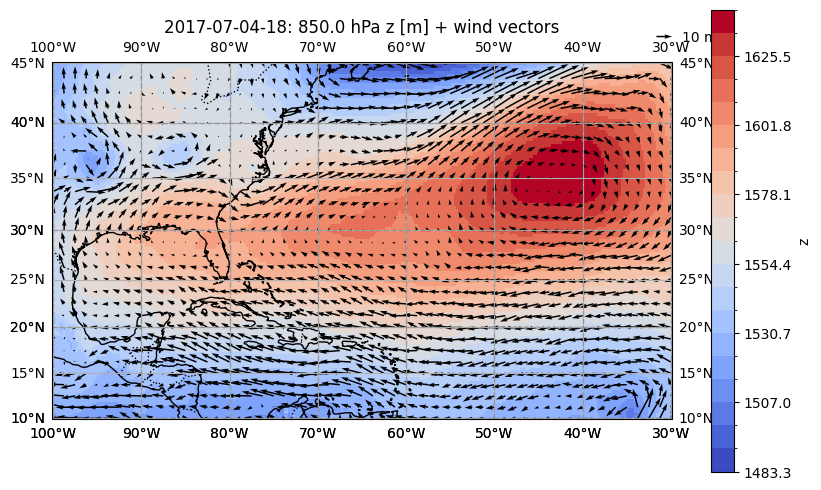

In [ ]:
#############################################
## USER INPUT #########
# Choose a scalar to plot in the map (comment/uncomment)
# var_plot = T2m
# var_plot = Td2m
# var_plot = phisfc
# var_plot = psfc
# var_plot = u10m
# var_plot = v10m
# var_plot = precip
# var_plot = u
# var_plot = v
var_plot = z
# var_plot = MSE2m
# var_plot = convergence
# var_plot = convergence_10m

# Include wind vectors? (10-m)
plot_windvectors = 1; #1='yes', otherwise 'no'
which_windvectors = 'plev';  #'plev' = (u,v) 850 hPa default; '10m' = (u10m,v10m)

# Choose a colormap
# cmap_plot = 'viridis'     #generally works (add '_r' to the end to reverse)
cmap_plot = 'coolwarm'  #better for pos/neg data (centered close to zero) (add '_r' to the end to reverse)
# cmap_plot = 'Reds'  #white to red (add '_r' to the end to reverse)
# cmap_plot = cmocean.cm.rain #'rain' is white to green -- great for precipitation
                              #lots of colorbars! https://matplotlib.org/cmocean/
#############################################



import matplotlib.pyplot as plt
import cartopy.crs as ccrs

##############################
## Set up the plot
plt.figure(figsize=(10, 6))
# ax = plt.axes(projection=ccrs.PlateCarree())  #PlateCarree doesn't have a central_longitude option to handle crossing 180 E/W
if lon_max > 180 and lon_min < 180:
  lon_map_central = 180
else:
  lon_map_central = 0
ax = plt.axes(projection=ccrs.Mercator(central_longitude=lon_map_central))
# ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())  # Set the extent to North America
ax.coastlines()  # Add coastlines
ax.gridlines(draw_labels=True)
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')  # Optionally add country borders for clarity

# Draw gridlines every 10 degrees -- this is only actually needed using central_longitude = 180 because for some reason it plots very few on its own
gl = ax.gridlines(draw_labels=True, crs=ccrs.PlateCarree(), linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlocator = plt.FixedLocator(range(-180, 181, 10))  # Specify longitude lines every 10 degrees
gl.ylocator = plt.FixedLocator(range(-90, 91, 10))    # Specify latitude lines every 10 degrees
gl.top_labels = False    # Disable labels on the top
gl.right_labels = False  # Disable labels on the right
##############################

##############################
# Define the colormap
cmap_start = var_plot.min()  # Starting value
cmap_end = var_plot.max()  # Ending value

N_cmapvals = 20
cmap_vals = np.linspace(cmap_start, cmap_end, N_cmapvals+1)
##If you want to define the colormap step size, you can use this code instead of the above 2 lines
# cmap_step = 5   # Step size
# cmap_vals = np.arange(cmap_start, cmap_end+cmap_step, cmap_step)  #need to add cmap_step at upper end to include cmap_end value in cmap (sigh)
# N_cmapvals = cmap_vals.size

cmap = plt.cm.get_cmap(cmap_plot, N_cmapvals)  # Create colormap with 10 discrete colors
norm = mcolors.BoundaryNorm(cmap_vals, cmap.N)  # Define the boundaries
##############################

##############################
# Plot the map of data
var_name = var_plot.attrs['short_name']
var_units = var_plot.attrs['units']
var_plot.plot(ax=ax, x='longitude', y='latitude', transform=ccrs.PlateCarree(),
                   cbar_kwargs={'label': var_name},cmap=cmap, norm=norm)  # Customize as needed
# var_plot.plot(ax=ax, x='longitude', y='latitude', transform=ccrs.PlateCarree(), vmin=-20, vmax=20,
#                    cbar_kwargs={'label': var_name},cmap=cmap)  # Customize as needed
##############################

title = f'{year}-{month}: Mean {var_name}'
plt.title(title)

##############################
# Overlay the wind vectors if desired
if plot_windvectors == 1:

  if which_windvectors == '10m':
    uvec = u10m
    vvec = v10m
    windvec_str = '10m'
  elif which_windvectors == 'plev':
    uvec = u
    vvec = v
    windvec_str = f'{plev} hPa'

  quiver_skip = 5 # Choose every nth point for a less cluttered vector field
  Q = ax.quiver(uvec.longitude[::quiver_skip], uvec.latitude[::quiver_skip],
            uvec.values[::quiver_skip, ::quiver_skip], vvec.values[::quiver_skip, ::quiver_skip],
            transform=ccrs.PlateCarree(), scale=400, scale_units='width')

  # Add a key that shows a reference vector for scale
  ax.quiverkey(Q, X=1.0, Y=1.07, U=10,
              label='10 m/s', labelpos='E')

  title = f'{year}-{month}-{day}-{hour}: {windvec_str} {var_name} [{var_units}] + wind vectors'
  plt.title(title)
##############################

plt.show()